In [1]:
from Fourier import *
sys.path.append('/data/liuziyang/Programs/pde_solver/')

In [6]:
k = 40
qmethod = 'G'
R = 200
label = 'R200'
angle_total = 64
angle_TYPE = 'P'
angle_for_test_data = 1
angle_for_test_model = 4
angle_mode = 'uniform'
angle_mode_NET = 'uniform'
NS_return = 'T'
NS_length = 3
ntest = 32
maxq = 0.1
FNO_ARG = (12,32,4)
test_filename = 'k{}_{}_{}_{},{},{}_{}_{}_NS{}_{}'.format(k, ntest, angle_TYPE, angle_for_test_data,angle_total,
                                         angle_mode, qmethod, maxq, NS_return, label)
NET_name = 'k{}_{}_{},{},{}_{}_{}_NS{}_{}_{},{},{}'.format(k, angle_TYPE, angle_for_test_model,angle_total,
                                         angle_mode_NET, qmethod, maxq, NS_return, label,
                                         FNO_ARG[0],FNO_ARG[1],FNO_ARG[2])
q, wave, u_i, u_NS, u_t = load_data(test_filename,
                                    device = device, NS_return = NS_return, Usage = 'Test')
wave, u_i, u_NS, u_t = wave[0], u_i[0], u_NS[0], u_t[0]
NET_name += '_0'
NET = torch.load('/data/liuziyang/Programs/pde_solver/Network/' 
                 + NET_name+'.pth',map_location=device)
myloss = LpLoss(size_average=True)

In [7]:
U_NET = NET(torch.cat([q,wave],1))
U_NS = u_i.clone().detach()
SUM_NET = U_NET.clone().detach()
SUM_NS = U_NS.clone().detach()
rel0 = 100*myloss.rel(U_NET,U_NS)
rel1 = 100*myloss.rel(SUM_NET,u_t)
rel2 = 100*myloss.rel(SUM_NS,u_t)
print('{},  NET-GT:  {:.4f}%,  NET-REL:  {:.4f}%,  GT-REL:  {:.4f}%'.format(0,rel0,rel1,rel2))

for i in range(1,NS_length+1):
    U_NET_TMP = U_NET.clone().detach()
    del U_NET
    U_NET = NET(torch.cat([q,U_NET_TMP],1))
    del U_NET_TMP
    del U_NS
    U_NS = u_NS[:,i-1].clone().detach()
    SUM_NET_OLD = SUM_NET.clone().detach()
    del SUM_NET
    SUM_NET = SUM_NET_OLD + U_NET
    del SUM_NET_OLD
    SUM_NS_OLD = SUM_NS.clone().detach()
    del SUM_NS
    SUM_NS = SUM_NS_OLD + U_NS
    del SUM_NS_OLD
    rel0 = 100*myloss.rel(U_NET,U_NS)
    if rel0>100:
        rel0 = '  NAN  '
    rel1 = 100*myloss.rel(SUM_NET,u_t)
    rel2 = 100*myloss.rel(SUM_NS,u_t)
    try:
        print('{},  NET-GT:  {:.4f}%,  NET-REL:  {:.4f}%,  GT-REL:  {:.4f}%'.format(i,rel0,rel1,rel2))
    except:
        print('{},  NET-GT:  {},  NET-REL:  {:.4f}%,  GT-REL:  {:.4f}%'.format(i,rel0,rel1,rel2))    

0,  NET-GT:  0.4302%,  NET-REL:  13.0049%,  GT-REL:  13.0117%
1,  NET-GT:  0.7780%,  NET-REL:  1.4574%,  GT-REL:  1.4037%
2,  NET-GT:  1.1991%,  NET-REL:  0.4688%,  GT-REL:  0.1368%
3,  NET-GT:  2.0735%,  NET-REL:  0.4442%,  GT-REL:  0.0130%


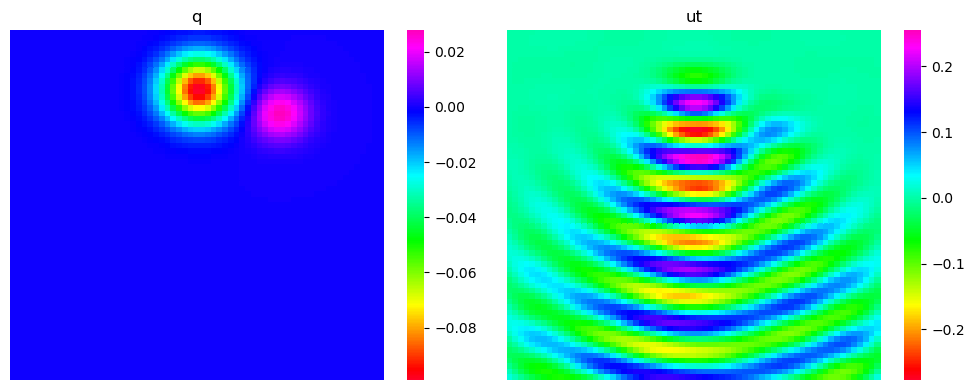

相对误差为0.21%


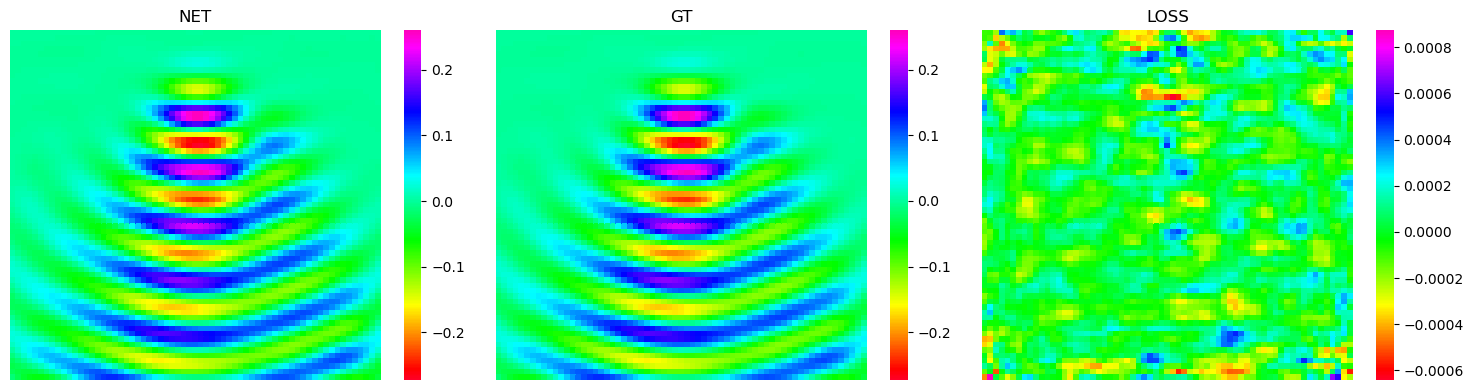

相对误差为0.38%


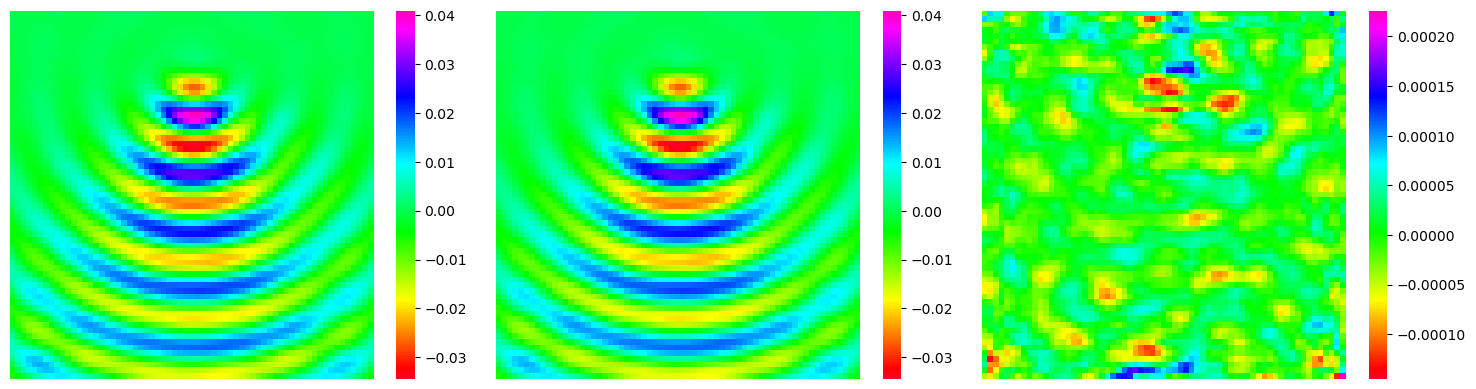

相对误差为0.54%


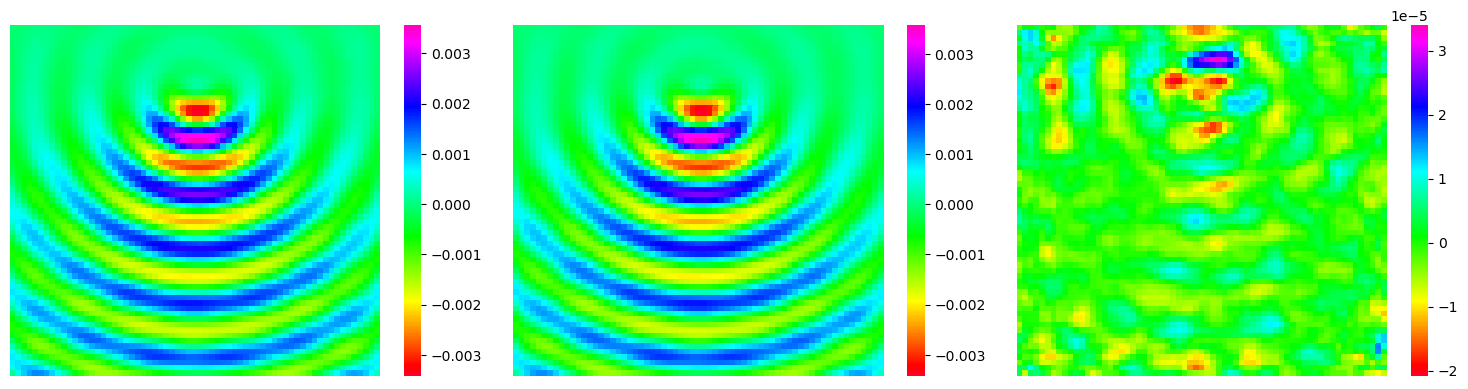

相对误差为1.14%


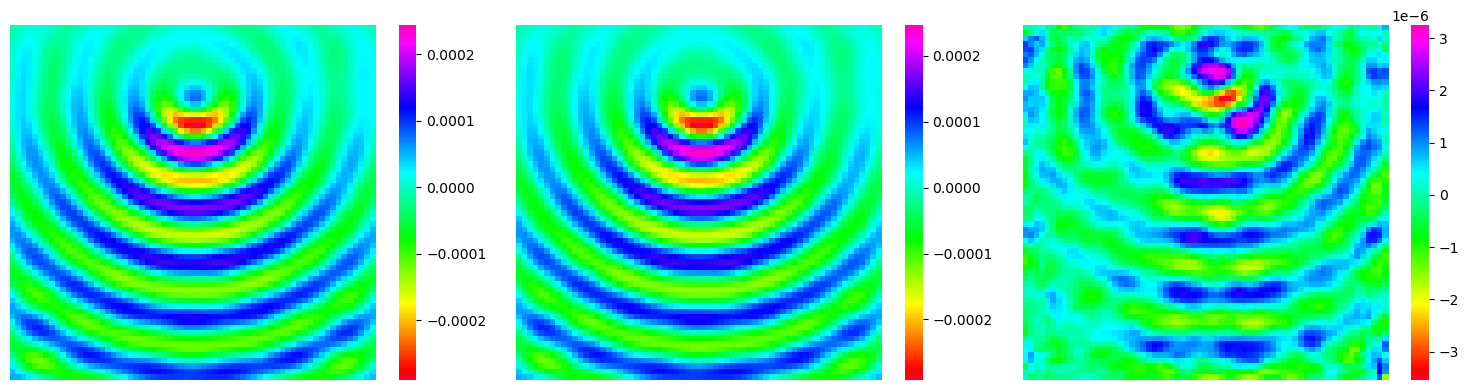

In [8]:
id = 10
heatmap_for_test(q[id,0],u_t[id,0],label_list=['q','ut'],loss=False)
test_U_NET = NET(torch.cat([q[id:(id+1)],wave[id:(id+1)]],1))
heatmap_for_test(test_U_NET[0,1],u_i[id,1],['NET','GT','LOSS'])
for i in range(NS_length):
    test_U_NET = NET(torch.cat([q[id:(id+1)],test_U_NET],1))
    heatmap_for_test(test_U_NET[0,1],u_NS[id,i,1],['','',''])

In [2]:
k = 40
qmethod = 'G'
R = 200
label = 'R200'
angle_total = 64
angle_TYPE = 'P'
angle_for_test_data = 64
angle_for_test_model = 4
angle_mode = 'uniform'
angle_mode_NET = 'uniform'
NS_return = 'T'
NS_length = 3
ntest = 32
maxq = 0.1
FNO_ARG = (12,32,4)
test_filename = 'k{}_{}_{}_{},{},{}_{}_{}_NS{}_{}'.format(k, ntest, angle_TYPE, angle_for_test_data,angle_total,
                                         angle_mode, qmethod, maxq, NS_return, label)
NET_name = 'k{}_{}_{},{},{}_{}_{}_NS{}_{}_{},{},{}'.format(k, angle_TYPE, angle_for_test_model,angle_total,
                                         angle_mode_NET, qmethod, maxq, NS_return, label,
                                         FNO_ARG[0],FNO_ARG[1],FNO_ARG[2])

q, wave, u_i, u_NS, u_t = load_data(test_filename,
                                    device = device, NS_return = NS_return, Usage = 'Test')
NET_name += '_1'
NET = torch.load('/data/liuziyang/Programs/pde_solver/Network/' 
                 + NET_name+'.pth',map_location=device)
myloss = LpLoss(size_average=True)

In [3]:
ERRS = []
t = 0.
for order in range(angle_total):
    wave_tmp = wave[order]
    u_t_tmp = u_t[order]
    
    ERR = []
    t_tmp = default_timer()
    U_NET = NET(torch.cat([q,wave_tmp],1))
    t += default_timer()-t_tmp
    SUM_NET = U_NET.clone().detach()
    ERR.append(100*myloss.rel(SUM_NET,u_t_tmp))
    
    for i in range(1,NS_length+1):
        ERR = []
        t_tmp = default_timer()
        U_NET_TMP = U_NET.clone().detach()
        del U_NET
        U_NET = NET(torch.cat([q,U_NET_TMP],1))
        del U_NET_TMP
        t += default_timer()-t_tmp
        SUM_NET_OLD = SUM_NET.clone().detach()
        del SUM_NET
        SUM_NET = SUM_NET_OLD + U_NET
        del SUM_NET_OLD
        ERR.append(100*myloss.rel(SUM_NET,u_t_tmp))
    ERRS.append(min(ERR).item())
print(t)

2.829446437768638


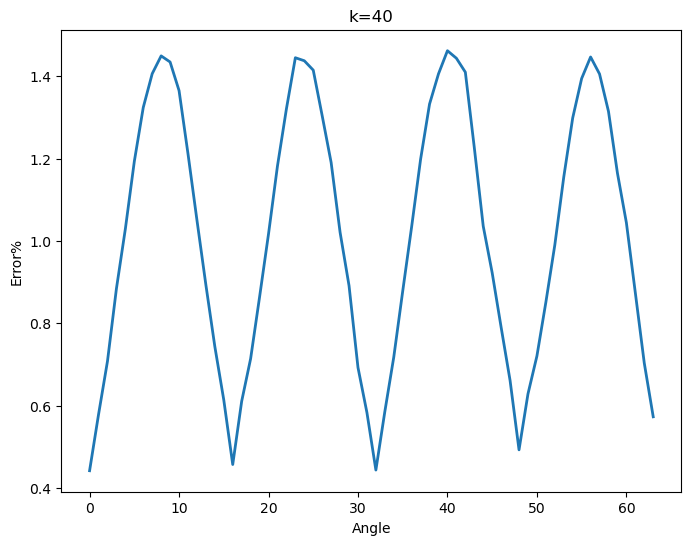

In [4]:
x_values = list(range(64))
y_values = ERRS
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1)
ax.plot(x_values, y_values, linewidth=2)
ax.set_title('k={}'.format(k))
ax.set_xlabel("Angle")
ax.set_ylabel("Error%")
plt.show()